##### Seq2Seq

Seq2Seq (short for Sequence-to-Sequence) is a deep learning architecture used when both the input and output are sequences, and their lengths can be different.

Seq2Seq is a model that takes one sequence as input and produces another sequence as output using two main neural networks:
- Encoder
- Decoder

#### Example:Machine Transalation

- Input:  "I am learning deep learning"
- Output: "J'apprends l'apprentissage profond"


#### We Faced Three Challanges in Seq2Seq data

- input sentance varable length
- output sentace variable length
- the varaiable length of input and output is different

#### Prerequesties of RNN

- we should fair know about RNN and LSTM

#### To understand Encoder-Decoder we use example of machine trnsalation


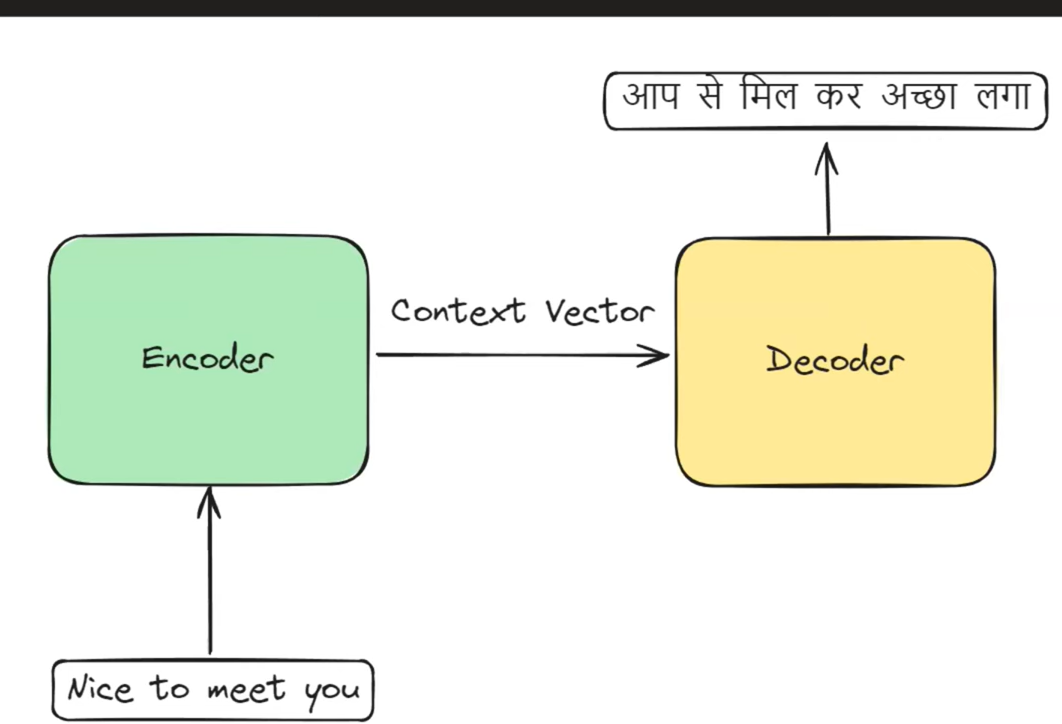

#### Overview

Encoder-Decoder is a neural network architecture where:
- Encoder processes input sequence → creates context vector
- Decoder uses context vector → generates output sequence
- Commonly used for sequence-to-sequence tasks like translation

#### Example:"Nice to meet you" → "आपसे मिलकर खुशी हुई" (English to hindi)

### Problem

Translate English → Hindi:
- Input (X): "Nice to meet you"
- Output (Y): "आपसे मिलकर खुशी हुई"

#### Step-by-Step Process

##### Step 1: Input Representation

- Vocabulary indices (example):
 - English Vocabulary (V_en = 5000):

   {"<PAD>": 0, "<START>": 1, "<END>": 2, "nice": 3, "to": 4, "meet": 5, "you": 6, ...}

 - Hindi Vocabulary (V_hi = 8000):      

   {"<PAD>": 0, "<START>": 1, "<END>": 2,"आपसे": 3, "मिलकर": 4, "खुशी": 5, "हुई": 6, ...}
Input sequence with special tokens:

- X = ["<START>", "nice", "to", "meet", "you", "<END>"]

X_indices = [1, 3, 4, 5, 6, 2]

- Embedding layer:
  - E_en ∈ ℝ^(5000 × 512)  # English embeddings
  - E_hi ∈ ℝ^(8000 × 512)  # Hindi embeddings
  - d = 512 (embedding dimension)

#### Step 2: Encoder Processing (Bidirectional LSTM)

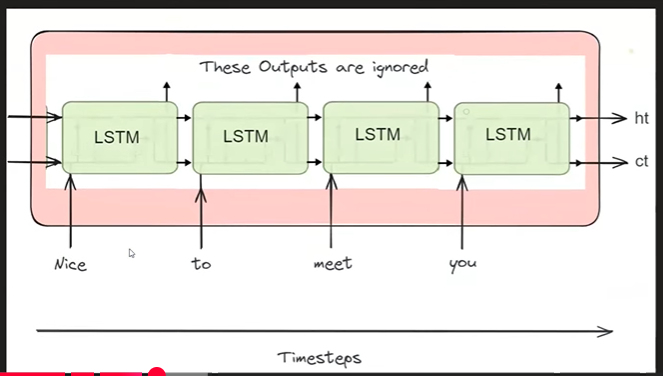


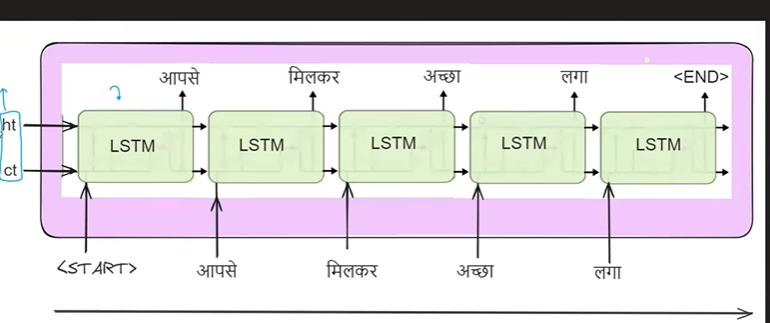

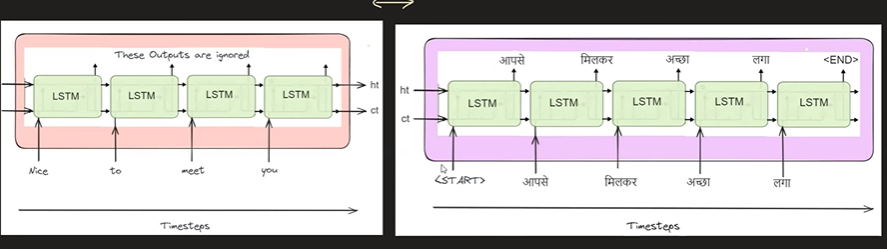

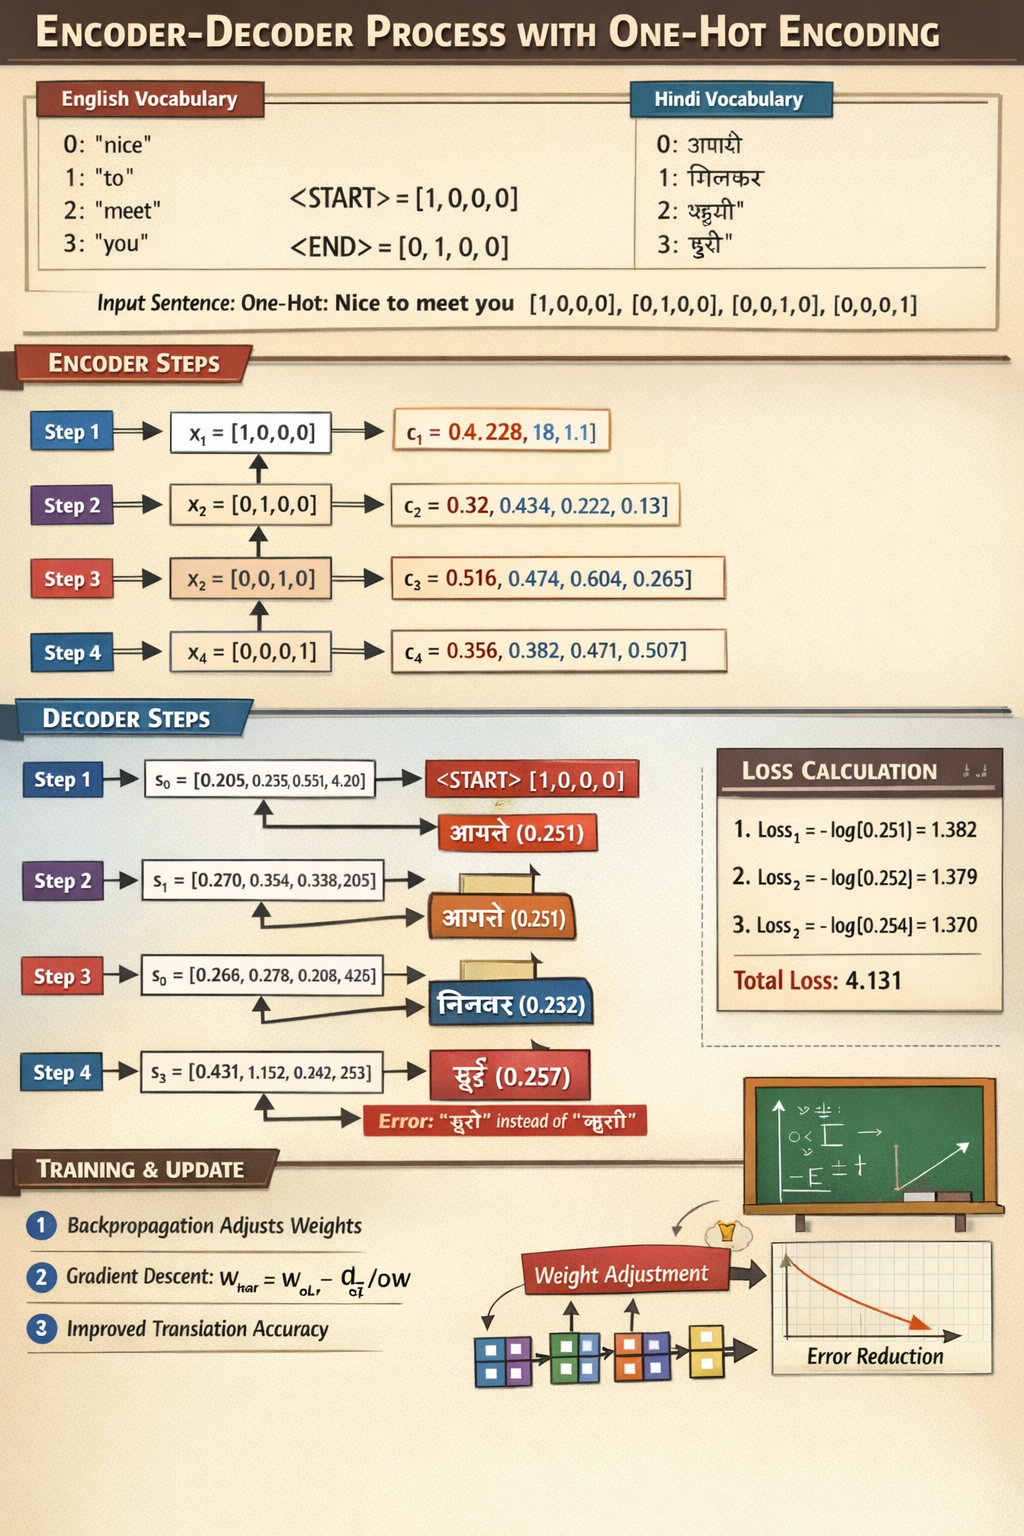

### Let's detaily write about ENCODER-and-DECODER



# **Encoder–Decoder Process (Step-by-Step Notes with One-Hot Encoding)**

## **1. Problem Overview**

We want to translate the English sentence:

> **“Nice to meet you”**

into Hindi:

> **“आपसे मिलकर खुशी हुई”**

This is done using an **Encoder–Decoder LSTM model** with **one-hot encoding**.


## **2. Vocabulary and Encoding**

### **English Vocabulary**

* nice → [1, 0, 0, 0]
* to → [0, 1, 0, 0]
* meet → [0, 0, 1, 0]
* you → [0, 0, 0, 1]

### **Hindi Vocabulary**

* आपसे → [1, 0, 0, 0]
* मिलकर → [0, 1, 0, 0]
* खुशी → [0, 0, 1, 0]
* हुई → [0, 0, 0, 1]

### **Special Tokens**

* `<START>` → [1, 0, 0, 0]
* `<END>` → [0, 1, 0, 0]


## **3. Encoder Working (English Sentence Processing)**

The **encoder LSTM** reads the English sentence **word by word** and converts it into a **context vector** that captures the overall meaning.

### **Initial Encoder State**

* Hidden state ( h_0 = [0, 0, 0, 0] )
* Cell state ( c_0 = [0, 0, 0, 0] )


### **Step 1: Word = “nice”**

* Input: one-hot vector of **nice**
* LSTM gates decide:

  * how much new information to store
  * how much old information to forget
* Updated states:

  * ( c_1 = [0.4, 0.28, 0.18, 0.1] )
  * ( h_1 = [0.342, 0.216, 0.126, 0.06] )

✔ Meaning of **“nice”** is now stored in memory.


### **Step 2: Word = “to”**

* Input: one-hot vector of **to**
* Previous state ( h_1 ) is reused
* Encoder updates memory again:

  * ( c_2 = [0.32, 0.434, 0.222, 0.13] )
  * ( h_2 = [0.248, 0.287, 0.132, 0.065] )

✔ Model now understands **“nice to”**.


### **Step 3: Word = “meet”**

* Input: one-hot vector of **meet**
* Context grows richer:

  * ( c_3 = [0.516, 0.474, 0.604, 0.265] )
  * ( h_3 = [0.423, 0.352, 0.378, 0.156] )

✔ Sentence meaning is getting clearer.


### **Step 4: Word = “you”**

* Input: one-hot vector of **you**
* Final encoder output:

  * ( c_4 = [0.356, 0.382, 0.471, 0.507] )
  * ( h_4 = [0.205, 0.255, 0.351, 0.420] )


### **Encoder Output**

* **Context Vector** = final hidden state ( h_4 )
* This vector represents the **entire English sentence**


## **4. Decoder Working (Hindi Sentence Generation)**

The **decoder LSTM** generates Hindi words **one at a time** using:

* encoder context
* previous predicted word


### **Decoder Initialization**

* Initial hidden state = encoder hidden state
* Initial cell state = encoder cell state
* First input = `<START>` token

### **Step 1: Generate First Hindi Word**

* Input: `<START>`
* Decoder predicts probabilities for all Hindi words
* Highest probability → **“आपसे”**

✔ Output so far: **आपसे**


### **Step 2: Generate Second Hindi Word**

* Input: “आपसे”
* Decoder updates its state
* Highest probability → **“मिलकर”**

✔ Output so far: **आपसे मिलकर**


### **Step 3: Generate Third Hindi Word**

* Input: “मिलकर”
* Decoder predicts:

  * Highest probability → **“हुई”**
  * Correct word should be → **“खुशी”**

- **Model makes a mistake here**

✔ Output so far: **आपसे मिलकर हुई**


### **Step 4: Generate `<END>` Token**

* Input: “हुई”
* Decoder predicts `<END>`
* Sentence generation stops


## **5. Final Generated Sentence**

```
आपसे मिलकर हुई
```

### **Correct Sentence**

```
आपसे मिलकर खुशी हुई
```

## **6. Loss Calculation (Cross-Entropy)**

* Loss is calculated by comparing:

  * predicted probability
  * correct target word

### **Loss per Step**

* Step 1 (आपसे): 1.382
* Step 2 (मिलकर): 1.379
* Step 3 (खुशी): 1.370 (error)
* Total Loss = **4.131**

Higher loss indicates **incorrect prediction**.

## **7. Backpropagation (Learning Step)**

After loss calculation:

1. Error is sent backward through:

   * Softmax layer
   * Output layer
   * Decoder LSTM
   * Encoder LSTM
2. Weights are updated using:

   ```
   New Weight = Old Weight − Learning Rate × Gradient
   ```
3. Incorrect word probability (**खुशी**) is increased
4. Wrong word probability (**हुई**) is decreased


## **8. Training Outcome**

* Model learns from its mistake
* After many training iterations:

  * Probability of **“खुशी”** increases
  * Correct Hindi sentence is generated





### Improvement of Encoder and Decoder

### 1.Replace One-Hot Encoding with Embedding Vectors
#### Problem with One-Hot Encoding
##### What happens in one-hot-encoder?
- Vocabulary size = V
- Each word → vector of length V
- Only one value = 1, rest are 0

Vocabulary: ["nice", "to", "meet", "you"]

- nice → [1, 0, 0, 0]
- meet → [0, 0, 1, 0]


Major Problems
- No meaning
  - “nice” and “good” look completely unrelated
- Very large vectors
  -  Vocabulary of 50,000 → vector of size 50,000
- Sparse & inefficient
- Poor generalization

### Solution: Embedding Vectors

##### What is an embedding?
- An embedding is a dense low-dimensional vector that captures semantic meaning.

#### Example (Embedding Size = 4)
- nice → [0.21, -0.45, 0.67, 0.12]
- good → [0.19, -0.43, 0.70, 0.10]
- bad  → [-0.60, 0.55, -0.20, -0.30]


#### Visual Representation
Word Index -->Embedding Matrix (V × d)
--> Dense Vector (d) -->Encoder LSTM


#### Benefits of Embeddings

Smaller vectors
- Faster computation
- Semantic meaning
- Better translation quality
- Required for modern NLP

#### Improvement 2: Deep LSTM (Multiple LSTM Layers)

##### Problem with Single LSTM Layer
A single LSTM:
- Captures surface-level patterns
- Struggles with complex sentence structure
- Limited representational power

##### Solution: Stack Multiple LSTM Layers (Deep LSTM)
Instead of:
- Input → LSTM → Output

We use:
- Input → LSTM₁ → LSTM₂ → LSTM₃ → Output

#### Benefits of Deep LSTM
- Better feature extraction
- Handles complex grammar
- Improves long-sentence translation
- Learns hierarchical language structure